<a href="https://colab.research.google.com/github/y-hiroki-radiotech/AIciaSolidProject/blob/master/practice_1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

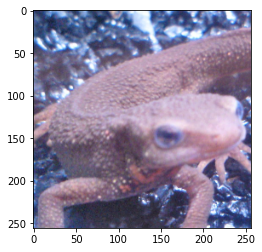

In [3]:
img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

### Q.7 average pooling

In [4]:
from numpy.lib.arraypad import pad
def pool_average(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)

    # padding
    h, w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)

    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy:iy+ksize_h, ix:ix+ksize_w, ic] = _img[iy:iy+ksize_h, ix:ix+ksize_w, ic].mean()
    
    out = out[pad_top:pad_top + h, pad_left:pad_left+w]
    return np.clip(out, 0, 255).astype(np.uint8)

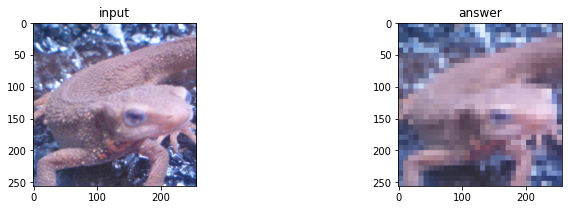

In [5]:
img_pool = pool_average(img_orig)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_pool)
plt.show()

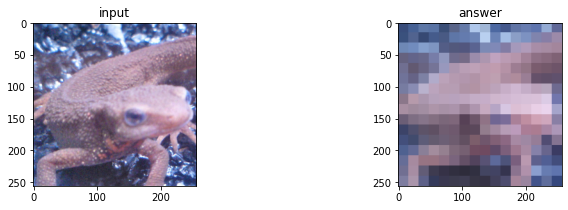

In [6]:
img_pool = pool_average(img_orig, ksize_h=16, ksize_w=16)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_pool)
plt.show()

### Q8 max pooling


In [16]:
def pool_max(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)

    # padding
    h, w  = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)

    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy:iy+ksize_h, ix:ix+ksize_w, ic] = _img[iy:iy+ksize_h, ix:ix+ksize_w, ic].max()

    out = out[pad_top:pad_top + h, pad_left:pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

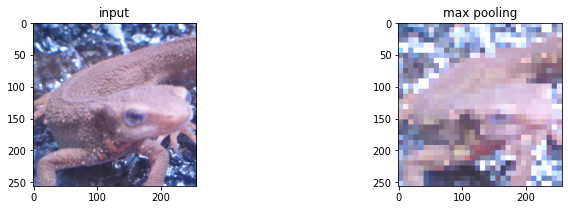

In [17]:
img_pool = pool_max(img_orig)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('max pooling')
plt.imshow(img_pool)
plt.show()

In [18]:
img_noise_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')

In [ ]:
img_gau = cv2.GaussianBlur(img_noise_orig, (3, 3), 1.3)
plt.figure(figsize=())